In [33]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
image = cv2.imread('Lake.jpg')

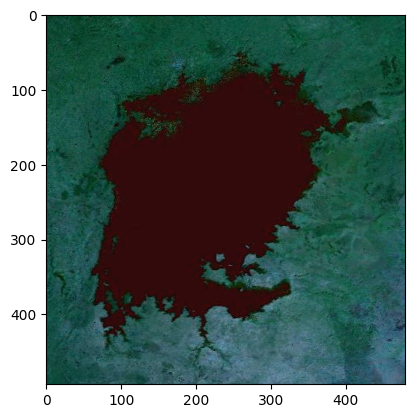

In [3]:
plt.imshow(image)

In [4]:
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

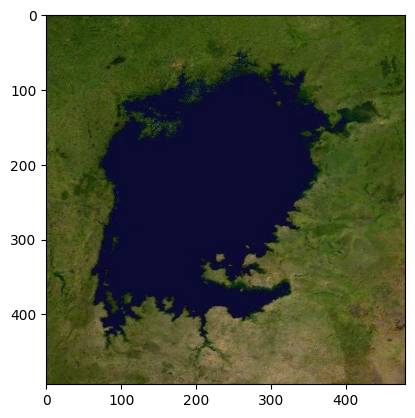

In [5]:
plt.imshow(rgb_img)

In [6]:
print(image.shape)

(494, 480, 3)


In [7]:
pixel = rgb_img.reshape(-1, 3)

In [8]:
pixel.shape

(237120, 3)

In [9]:
no_cluster = 5
kmeans = KMeans(n_clusters = no_cluster, random_state = 42)

In [10]:
kmeans.fit(pixel)

C:\Users\ujjwol\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
label = kmeans.labels_

In [12]:
clus_centroid = kmeans.cluster_centers_
clus_centroid = clus_centroid.astype(int)

In [13]:
np.rint(clus_centroid)
#Greenish
#Dark Blue
#Greyish

array([[122., 112.,  69.],
       [ 11.,  11.,  46.],
       [ 46.,  64.,  13.],
       [ 67.,  82.,  24.],
       [ 91.,  94.,  43.]])

In [14]:
segmented_image = np.zeros_like(pixel)

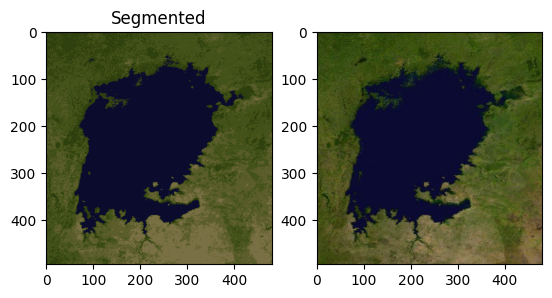

In [15]:
clustered_image = clus_centroid[label].astype(np.uint8).reshape(image.shape)
plt.subplot(1,2,1)
plt.imshow(clustered_image)
plt.title('Segmented')
plt.subplot(1,2,2)
plt.imshow(rgb_img)

In [16]:
# Calculate the number of pixels in each cluster
cluster_sizes = np.bincount(label, minlength=no_cluster)

# Calculate the total number of pixels in the image
total_pixels = label.size

# Calculate the percentage of pixels in each cluster
percentage_pixels = (cluster_sizes / total_pixels) * 100

# Display the percentage of pixels in each cluster
for i, percentage in enumerate(percentage_pixels):
    print(f"Cluster {i}: {percentage:.2f}%")

Cluster 0: 8.96%
Cluster 1: 31.47%
Cluster 2: 13.05%
Cluster 3: 29.26%
Cluster 4: 17.26%


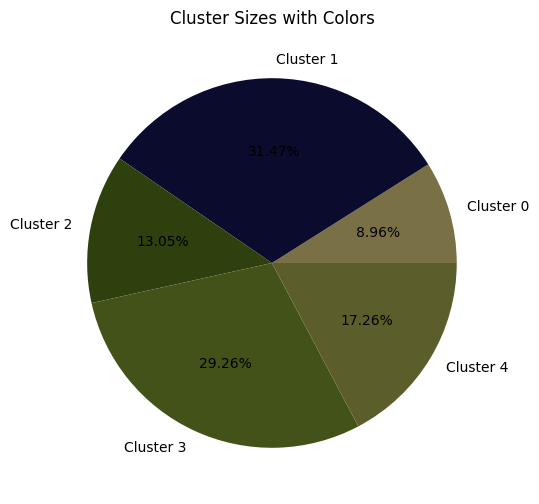

In [17]:
# Visualize cluster sizes in a pie chart with assigned colors
plt.figure(figsize=(6, 6))
plt.pie(percentage_pixels, labels=[f"Cluster {i}" for i in range(no_cluster)],
        autopct='%.2f%%', startangle=0, colors=clus_centroid / 255)
plt.title('Cluster Sizes with Colors')
plt.show()

In [18]:
# Create a DataFrame to store cluster information
cluster_data = {
    'Cluster': range(no_cluster),
    'Pixel Count': cluster_sizes,
    'Red': clus_centroid[:, 0],
    'Green': clus_centroid[:, 1],
    'Blue': clus_centroid[:, 2]
}

cluster_df = pd.DataFrame(cluster_data)

# Set the index of the DataFrame to the cluster indices
cluster_df.set_index('Cluster', inplace=True)

cluster_df

,Pixel Count,Red,Green,Blue
Cluster,,,,
0,21252,122,112,69
1,74619,11,11,46
2,30938,46,64,13
3,69389,67,82,24
4,40922,91,94,43


In [19]:
lake_pix = cluster_df.iloc[1]['Pixel Count']
lake_pix

74619

In [20]:
total_pix = cluster_df.sum()['Pixel Count']
total_pix

237120

In [21]:
lake_percent = ((lake_pix/total_pix)*100)
lake_percent

31.468876518218625

In [22]:
lake_area = (lake_percent/100)*200000
lake_area

62937.75303643725

In [23]:
print(KMeans)

<class 'sklearn.cluster._kmeans.KMeans'>


In [24]:
wcss = []
for k in range(2, 15):
    kmeansclus = KMeans(n_clusters = k, n_init=10, random_state= 42)
    kmeansclus.fit(pixel)
    wcss.append(kmeansclus.inertia_)

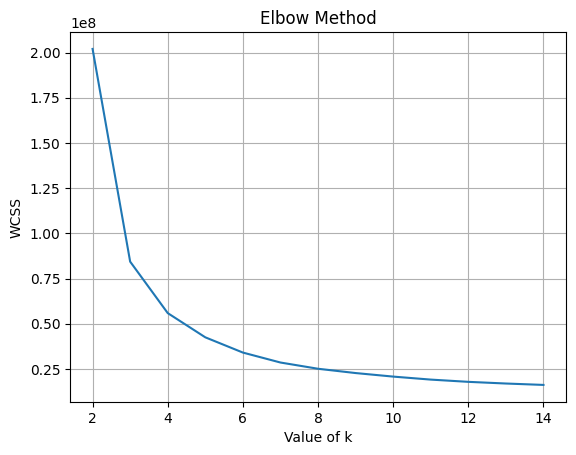

In [25]:
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Value of k')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6895816037042289
For n_clusters = 3 The average silhouette_score is : 0.6459132670182883
For n_clusters = 4 The average silhouette_score is : 0.5704792655685993
For n_clusters = 5 The average silhouette_score is : 0.5556965350124019


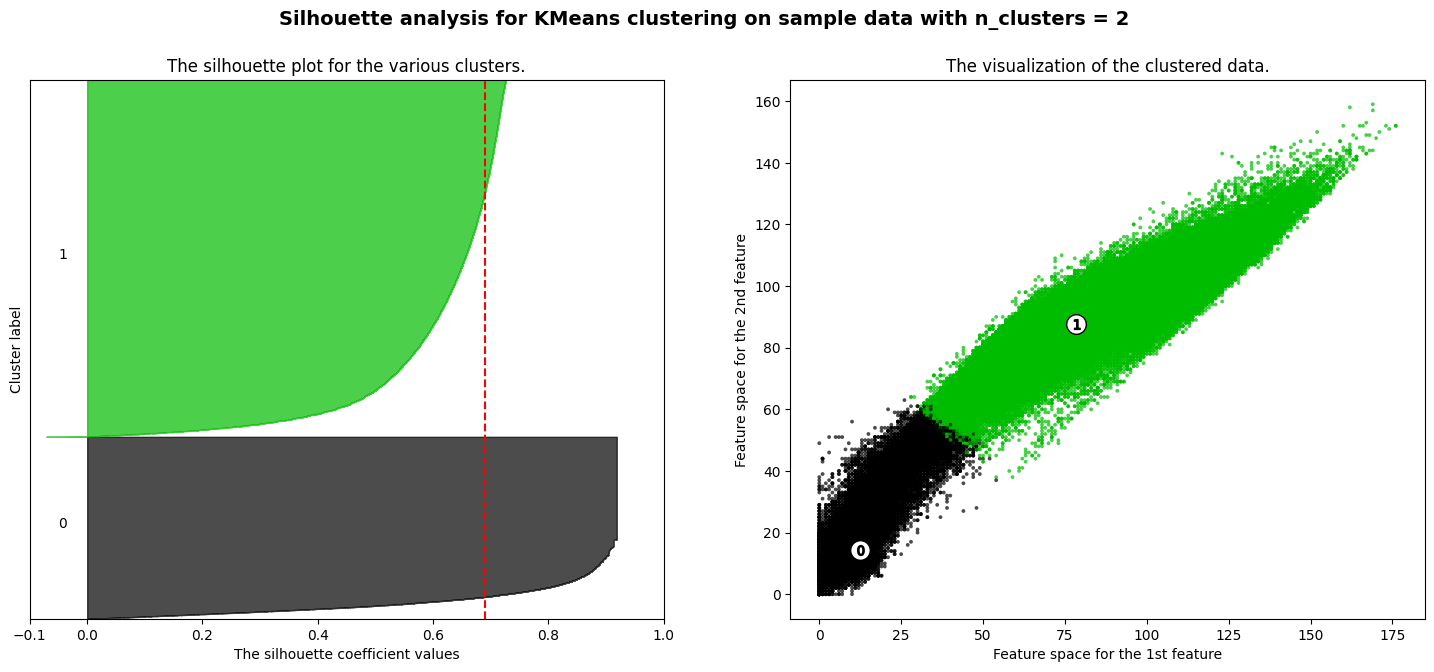

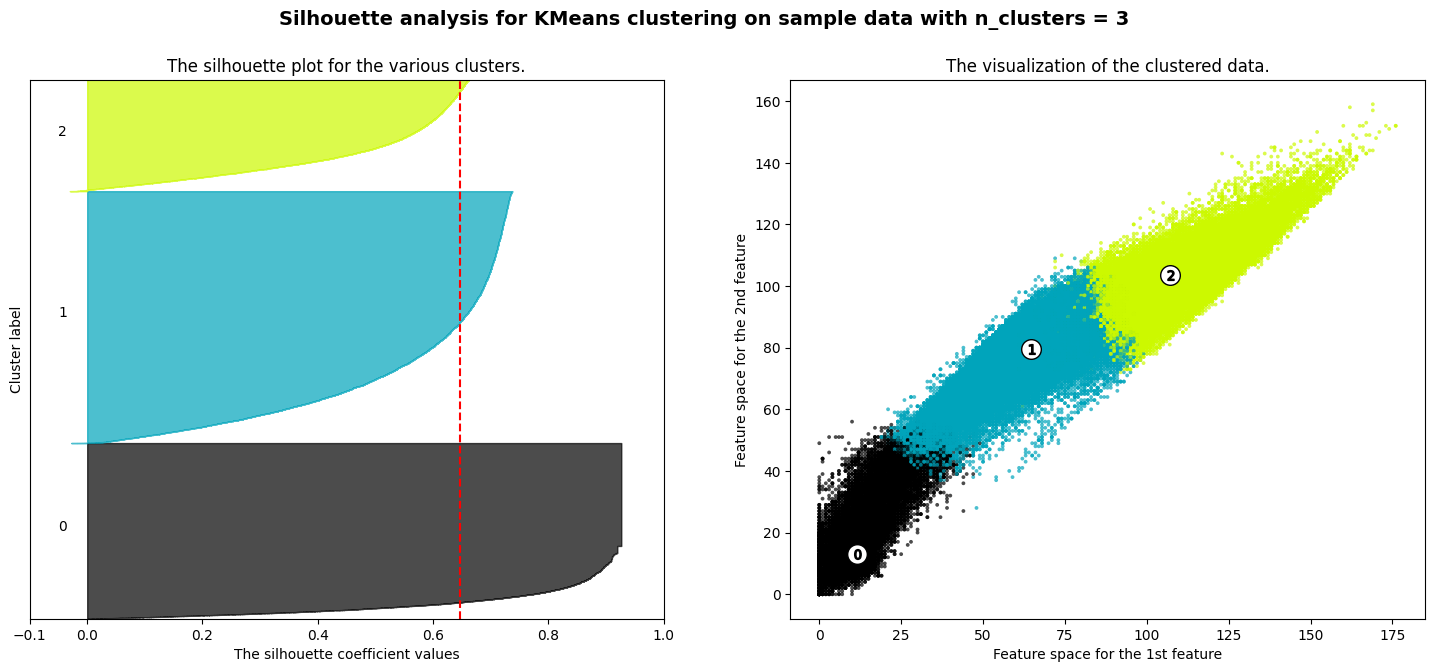

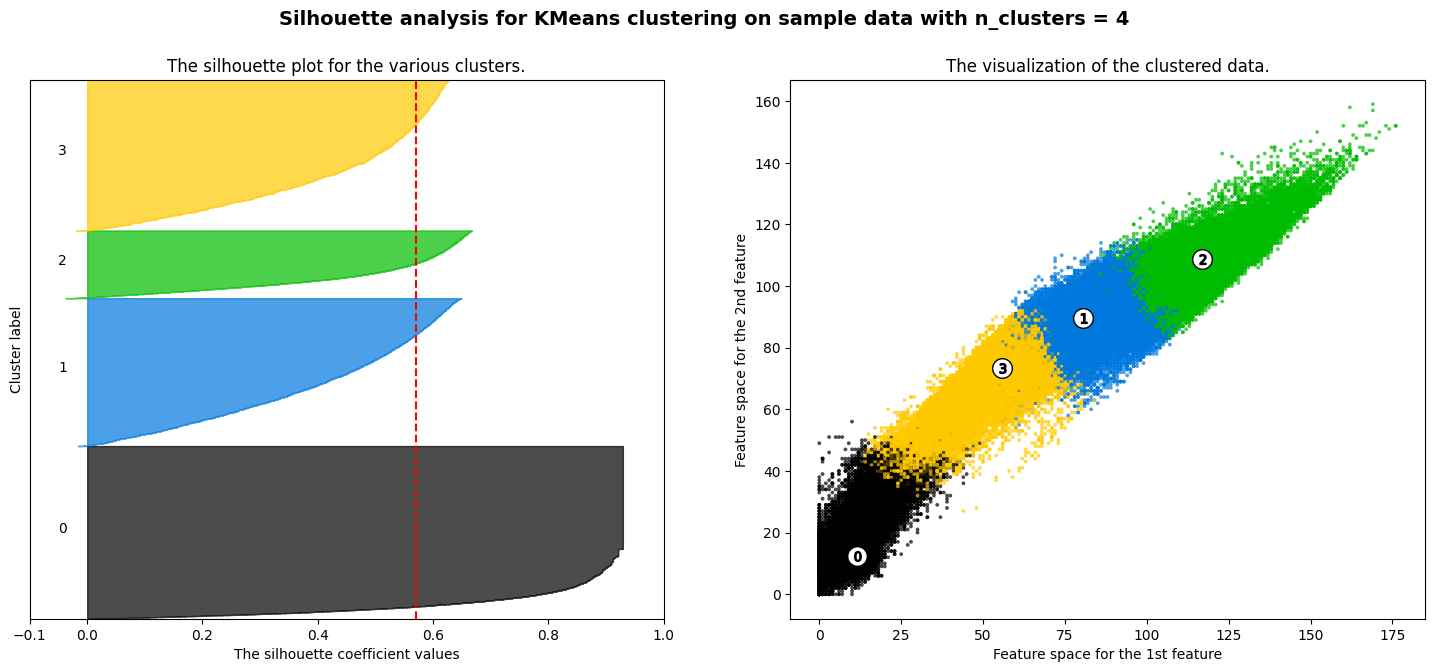

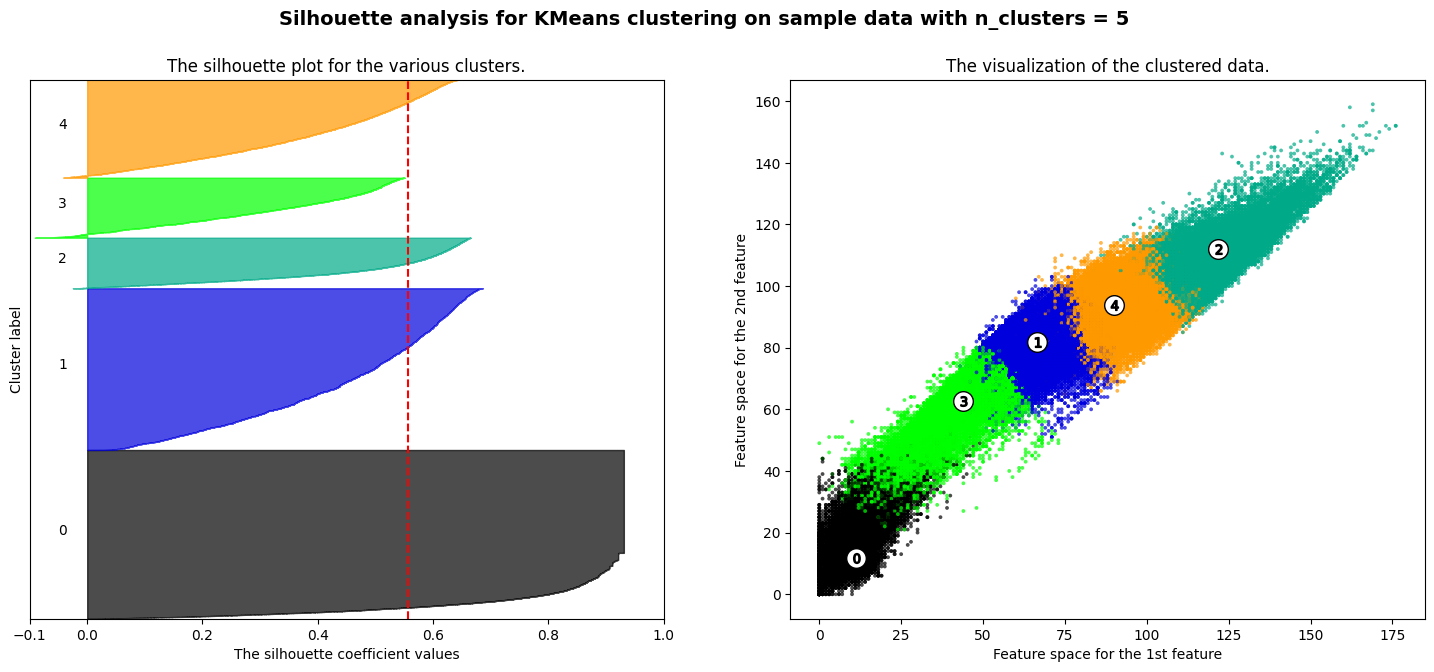

In [34]:
range_n_clusters = np.arange(2,6)
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pixel) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(pixel)
    
    silhouette_avg = silhouette_score(pixel, cluster_labels)
    print("For n_clusters =",n_clusters,
    "The average silhouette_score is :",silhouette_avg,)
    
    sample_silhouette_values = silhouette_samples(pixel, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels== i]
    
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
    pixel[:, 0], pixel[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
plt.show()